# Distribuciones en forma de anillo

Es difícil usar k-means cuando tenemos una distrib. en forma de anillo

In [49]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd 
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#Función para generar un anillo de puntos

def ring(r_min = 0, r_max = 1, n_samples = 360): #radio min/max, nº de muestras
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance): #para cada combinación de ángulo y distancia
        data.append([d*cos(a), d*sin(a)]) #coord. polares
    return np.array(data)

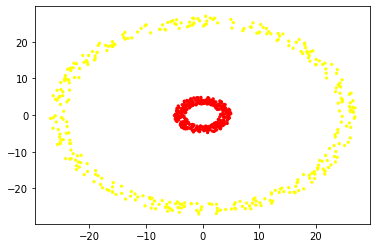

In [51]:
data1 = ring(3, 5) #llamamos a la función
data2 = ring(24, 27) #llamamos a la función

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")

# Algoritmo con Kmeans

Evidentemente la clusterización no es buena

In [52]:
from sklearn.cluster import KMeans

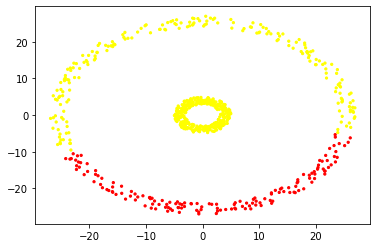

In [53]:
km = KMeans(2).fit(data) #le indicamos que hay 2 clústers

clust = km.predict(data)

plt.scatter(data[:,0], data[:, 1], c = clust, s = 5, cmap="autumn") #s es size

# Algoritmo de los K Medoides

No hay mucha mejora

In [54]:
from pyclust import KMedoids

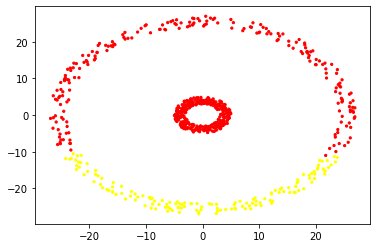

In [55]:
kmed = KMedoids(2).fit_predict(data)

plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="autumn")

# Algoritmo del Clustering Espectral

Busca vecinos

In [56]:
from sklearn.cluster import SpectralClustering

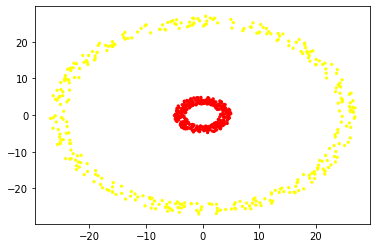

In [57]:
clust = SpectralClustering(2).fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "autumn")

* Podemos estimar la k:
    * No: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales:
            * Si: K-Medoides 
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering Espectral